# Homework 1 - Computational Physics 2

- Submission deadline: **Friday 27th January 2023 (by the end of the day).**


- When you finish the assignment, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- You may work on this homework individually or in pairs. Submitted assignments should have maximum 2 authors.


- You can call your notebook with your surname/s, e.g. hw1_names.ipynb, and also include your name/s in the notebook.


- Within a single python notebook, add the following:

## Problem 1 (10 points): Quantum Harmonic Oscillator

The Schrödinger equation for the quantum harmonic oscillator is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi=E\psi$$

It can be rewritten, in terms of a new variable, $\xi\equiv\sqrt{\frac{m\,\omega}{\hbar}}x$, as follows:

$$\frac{d^2\psi}{d\xi^2}=\left(\xi^2 -K\right)\psi$$

where $K\equiv\frac{2E}{\hbar\omega}$ is the energy in units of $\frac{1}{2}\hbar\omega$.

(a) Find the **ground state energy** of the harmonic oscillator, to five significant digits, by using **the shooting method**. That is, solve the above equation numerically, varying $K$ until you get a wave function that goes to zero at large $\xi$. The appropriate boundary conditions for the ground state (and any even state) are $\psi(0) = 1$, $\psi'(0) = 0$.

(b) Make a few illustrative panels showing plots of the wave function for different values of $K$ as it converges to the solution. What does the tail of the wave function does when the values are slightly above or below the correct solution?

(c) Find the **first three excited state energies** (to five significant digits) for the harmonic oscillator, using **the shooting method**. For the first (and third) excited state you will need to set $\psi(0) = 0$, $\psi'(0) = 1$).

(d) Make a few illustrative panels showing plots of the wave functions for different values of $K$ as they converge to their respective solutions.

(e) Make a single plot showing the **harmonic potential** joinly with the **energy ladder** of the quantum harmonic oscillator (include the ground state plus the first three excited states that you calculated above, each with their **respective wave functions**). Consider the particle to be an electron and choose appropriate units for any physical parameters you may need.

## Problem 2 (10 points): Thermodynamics and Heat Conduction

Use appropriate numerical algorithms to study how the temperature profile in a heated metal wire evolves in time, under different initial and boundary conditions. For this, you need to solve the 1D heat equation:

$$\frac{\partial T}{\partial t}=\alpha\frac{\partial^2 T}{\partial x^2}$$

where $T=T(x, t)$ describes the temperature of the metal, $x$ is position, $t$ is time, and $\alpha$ is the thermal diffusivity of the metal. We will consider two metals as I explain below.

Assume that the metal wire has a length of $20\,\rm cm$, and choose the wire midpoint as the origin for the problem.

The initial temperature profile in degrees Celsius is given by the following function:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2$$

where $x$ is in units of $\rm cm$. 

(a) Imagine we keep the temperatures at the edges of the metal wire fixed at a temperature of $25\,\rm C$. Construct a Crank-Nicolson algorithm to simulate the evolution of the temperature profile and find the time in seconds at which thermal equilibrium is reached in two metal wires (one made of Copper with $\alpha=111\,\rm \frac{mm^2}{s}$ and one made of Molybdenum with $\alpha=54.3\,\rm \frac{mm^2}{s}$ ).

(b) Can we use explicit or FFT methods to solve the problem described in literal (a)? Explain.

(c) Make a labeled animation showing six panels (with 2 columns and three rows): the top two panels should show the time evolution of the 1D temperature profile of each metal wire, the medium two panels how the temperature surface is built up in time, and the bottom two panels the surface projection onto the $x$-$t$ plane.

(d) Re-study heat diffusion only in the Copper wire, but this time add some noise $f(x)$ with amplitude $\beta$ to the initial condition:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2 + \beta\,f(x)\,g(x)$$

Note that you need to find an appropriate apodization function $g(x)$ so that the initial boundary conditions remain fixed at $25\,\rm C$. Similarly, you should choice an amplitude for the noise function to be less than a thousandth of the peak temperature value. Does adding the noise change the time at which thermal equilibrium is reached or not? Why yes or why not?

(e) Re-study heat diffusion only in the Copper wire for the original $T(x, 0)$, but this time assume that the boundaries cannot be kept constant (because of e.g. a faulty cooling system). Instead they also evolve in time according to the following functions:

$T(-10\,{\rm cm}, t) = 25 + t$

$T(+10\,{\rm cm}, t) = 25 + 0.5\,t$

where $T(x, t)$ is in degrees Celsius, and $t$ in seconds. Run the simulation until the temperature profile shows a linear trend.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
psi = sp.symbols("psi", cls = sp.Function)
xi = sp.symbols("xi")
K = sp.symbols("K")
h = sp.symbols("hbar")
w = sp.symbols("\omega ")

In [3]:
# Define ODE

diffeq = sp.Eq(psi(xi).diff(xi,2), (xi**2-K)*psi(xi))

display(diffeq)

Eq(Derivative(psi(xi), (xi, 2)), (-K + xi**2)*psi(xi))

### a)

In [4]:
# Solve the ODE:

diffeq = sp.Eq(psi(xi).diff(xi,2), (xi**2-K)*psi(xi))

result = sp.dsolve(diffeq, psi(xi), ics = {psi(0):1, psi(20):0})

display(result)

Eq(psi(xi), -K*xi**5*r(3)/20 + C2*(K**2*xi**4/24 - K*xi**2/2 + xi**4/12 + 1) + C1*xi*(xi**4/20 + 1) + O(xi**6))

### 3. Now, guess the initial value of $f'(0)$ and use a shooting method to check whether the target value $f(20)$ is found.

In [5]:
# Slope function

func = lambda xi, s: np.dot(np.array([[0, 1], [xi**2 - k , 0]]), s)

In [6]:
from scipy.integrate import solve_ivp


In [7]:
# Guess 1 for psi'(0):

v_00 = 0.0

In [8]:
# Spacing
h_1 = 0.1

# Initial/boundary conditions

xi_00 = 0.
xi_ff = 6.

psi_00 = 1.0

# x_axis
xi_axis = np.arange(xi_00, xi_ff + h_1, h_1)

# Find the solution using the shooting method
k = 0.999951

sol = solve_ivp(func, [xi_00, xi_ff], [psi_00, v_00], method='RK45', t_eval = xi_axis)




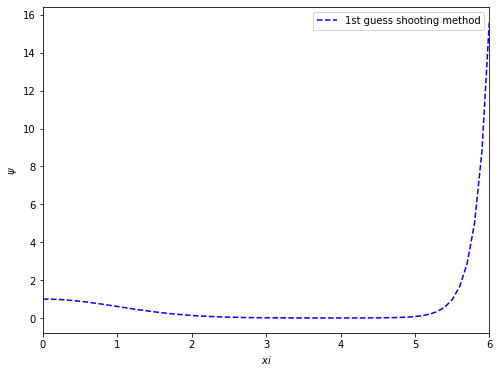

In [9]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(sol.t, sol.y[0], "b", linestyle = '--', label ="1st guess shooting method")

plt.xlabel('$xi$')
plt.ylabel('$\psi$')

plt.xlim(0,6)
# plt.ylim(-4,4)

plt.legend()
plt.show()

### b)

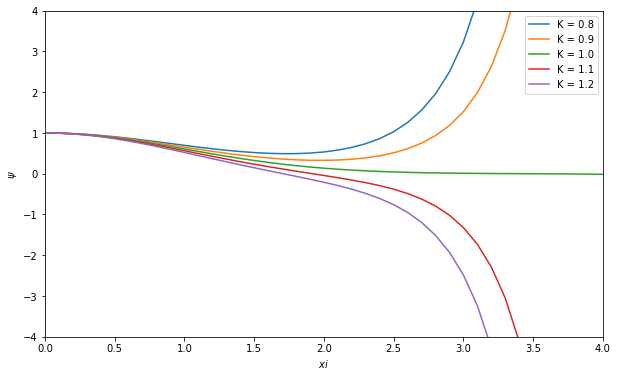

In [10]:
plt.figure(figsize=(10,6))

ks = np.arange(0.8,1.2+0.1,0.1)

for k in ks:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00, v_00], method='RK45', t_eval = xi_axis)
    
    plt.plot(sol.t, sol.y[0])


plt.xlim(0,4)
plt.ylim(-4,4)

plt.xlabel('$xi$')
plt.ylabel('$\psi$')
    
plt.legend([f'K = {round(k, 3)}' for k in ks], loc=1)
plt.show()

### c) 

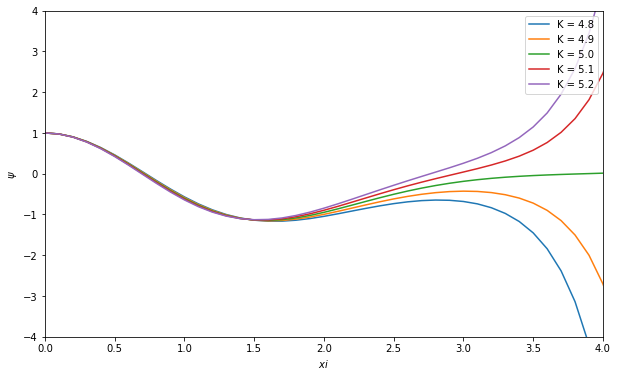

In [11]:
plt.figure(figsize=(10,6))

ks = np.arange(4.8,5.2+0.1,0.1)

for k in ks:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00, v_00], method='RK45', t_eval = xi_axis)
    
    plt.plot(sol.t, sol.y[0])


plt.xlim(0,4)
plt.ylim(-4,4)

plt.xlabel('$xi$')
plt.ylabel('$\psi$')
    
plt.legend([f'K = {round(k, 3)}' for k in ks], loc=1)
plt.show()

In [12]:
K1 = 5
E1 = (K1*h*w)/2
display( E1)

5*\omega*hbar/2

In [13]:
# Guess 1 for psi'(0):

v_00 = 1.0

In [14]:
# Spacing
h_1 = 0.1

# Initial/boundary conditions

xi_00 = 0.
xi_ff = 6.

psi_00 = 0.0

# x_axis
xi_axis = np.arange(xi_00, xi_ff + h_1, h_1)

# Find the solution using the shooting method
k = 5.0

sol = solve_ivp(func, [xi_00, xi_ff], [psi_00, v_00], method='RK45', t_eval = xi_axis)



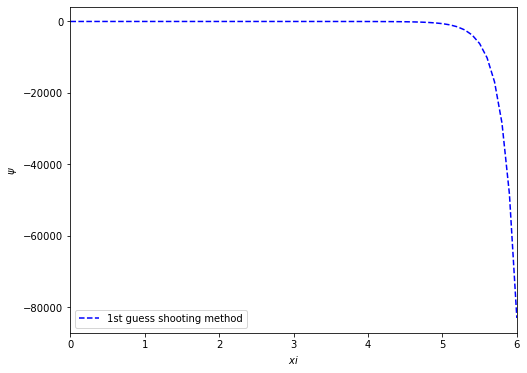

In [15]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(sol.t, sol.y[0], "b", linestyle = '--', label ="1st guess shooting method")

plt.xlabel('$xi$')
plt.ylabel('$\psi$')

plt.xlim(0,6)
# plt.ylim(-4,4)

plt.legend()
plt.show()

In [16]:
K2 = 3
E2 = (K2*h*w)/2
display( E2)

3*\omega*hbar/2

In [17]:
K3 = 7
E3 = (K3*h*w)/2
display( E3)

7*\omega*hbar/2

### d)

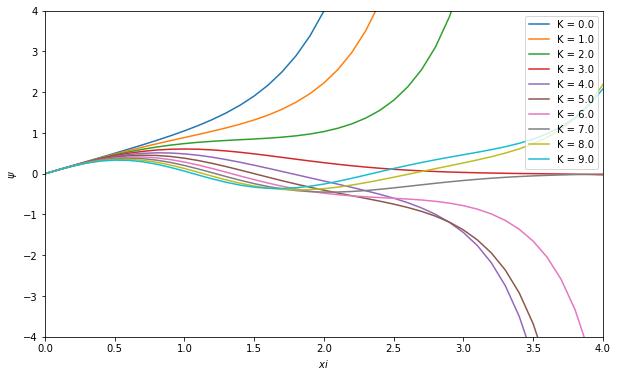

In [18]:
plt.figure(figsize=(10,6))

ks = np.arange(0.0,10.0,1)

for k in ks:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00, v_00], method='RK45', t_eval = xi_axis)
    
    plt.plot(sol.t, sol.y[0])


plt.xlim(0,4)
plt.ylim(-4,4)

plt.xlabel('$xi$')
plt.ylabel('$\psi$')
    
plt.legend([f'K = {round(k, 3)}' for k in ks], loc=1)
plt.show()

### e)

## Problem 2 (10 points): Thermodynamics and Heat Conduction

Use appropriate numerical algorithms to study how the temperature profile in a heated metal wire evolves in time, under different initial and boundary conditions. For this, you need to solve the 1D heat equation:

$$\frac{\partial T}{\partial t}=\alpha\frac{\partial^2 T}{\partial x^2}$$

where $T=T(x, t)$ describes the temperature of the metal, $x$ is position, $t$ is time, and $\alpha$ is the thermal diffusivity of the metal. We will consider two metals as I explain below.

Assume that the metal wire has a length of $20\,\rm cm$, and choose the wire midpoint as the origin for the problem.

The initial temperature profile in degrees Celsius is given by the following function:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2$$

where $x$ is in units of $\rm cm$. 

(a) Imagine we keep the temperatures at the edges of the metal wire fixed at a temperature of $25\,\rm C$. Construct a Crank-Nicolson algorithm to simulate the evolution of the temperature profile and find the time in seconds at which thermal equilibrium is reached in two metal wires (one made of Copper with $\alpha=111\,\rm \frac{mm^2}{s}$ and one made of Molybdenum with $\alpha=54.3\,\rm \frac{mm^2}{s}$ ).

(b) Can we use explicit or FFT methods to solve the problem described in literal (a)? Explain.

(c) Make a labeled animation showing six panels (with 2 columns and three rows): the top two panels should show the time evolution of the 1D temperature profile of each metal wire, the medium two panels how the temperature surface is built up in time, and the bottom two panels the surface projection onto the $x$-$t$ plane.

(d) Re-study heat diffusion only in the Copper wire, but this time add some noise $f(x)$ with amplitude $\beta$ to the initial condition:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2 + \beta\,f(x)\,g(x)$$

Note that you need to find an appropriate apodization function $g(x)$ so that the initial boundary conditions remain fixed at $25\,\rm C$. Similarly, you should choice an amplitude for the noise function to be less than a thousandth of the peak temperature value. Does adding the noise change the time at which thermal equilibrium is reached or not? Why yes or why not?

(e) Re-study heat diffusion only in the Copper wire for the original $T(x, 0)$, but this time assume that the boundaries cannot be kept constant (because of e.g. a faulty cooling system). Instead they also evolve in time according to the following functions:

$T(-10\,{\rm cm}, t) = 25 + t$

$T(+10\,{\rm cm}, t) = 25 + 0.5\,t$

where $T(x, t)$ is in degrees Celsius, and $t$ in seconds. Run the simulation until the temperature profile shows a linear trend.

In [50]:
# Steps:

h = 0.25 # for space
k = 0.75 # for time

x0 = -10
xf = 10

t0 = 0
tf = 150

# Time and Space Vectors
x = np.arange(-10, 10 + h, h)

t = np.arange(0, 150 + k, k)

print(len(x),len(t)) # Matrices should n-2 x n-2 = 39x39 

81 201


In [51]:
# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=0)

# Initial conditions

ics = 175 - 50*np.cos((np.pi*x1)/5) - x**2

In [52]:
# Matrix for temperatures

n = len(x)
m = len(t)

T = np.zeros((n,m))

print(T.shape)

(81, 201)


In [53]:
# Add the bcs:

T[0, :] = bcs[0]

T[-1, :] = bcs[1]


# Add the ics

T[:, 0] = ics

print(T)

[[25.         25.         25.         ... 25.         25.
  25.        ]
 [30.55308297  0.          0.         ...  0.          0.
   0.        ]
 [37.19717419  0.          0.         ...  0.          0.
   0.        ]
 ...
 [37.19717419  0.          0.         ...  0.          0.
   0.        ]
 [30.55308297  0.          0.         ...  0.          0.
   0.        ]
 [25.         25.         25.         ... 25.         25.
  25.        ]]


In [54]:
alpha = sp.symbols("alpha")

alpha = 1.11 #in cm

r_factor = (alpha)*k/h**2

print(r_factor)


13.32


## First matrix:

In [55]:
D1_matrix_0 = np.diag([2 + 2*r_factor]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

#print(D1_matrix_0)
print(D1_matrix)
print(D1_matrix.shape)

[[ 28.64 -13.32   0.   ...   0.     0.     0.  ]
 [-13.32  28.64 -13.32 ...   0.     0.     0.  ]
 [  0.   -13.32  28.64 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...  28.64 -13.32   0.  ]
 [  0.     0.     0.   ... -13.32  28.64 -13.32]
 [  0.     0.     0.   ...   0.   -13.32  28.64]]
(79, 79)


## Second matrix:

In [56]:
D2_matrix_0 = np.diag([2 - 2*r_factor]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

print(D2_matrix)
print(D2_matrix.shape)

[[-24.64  13.32   0.   ...   0.     0.     0.  ]
 [ 13.32 -24.64  13.32 ...   0.     0.     0.  ]
 [  0.    13.32 -24.64 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ... -24.64  13.32   0.  ]
 [  0.     0.     0.   ...  13.32 -24.64  13.32]
 [  0.     0.     0.   ...   0.    13.32 -24.64]]
(79, 79)


### The b vector, vector of known values

In [57]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T[1:-1, j].copy()
    #print(b.shape)
    #print(b)
    
    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor*(T[0, j+1] + T[0, j])
    b[-1] = b[-1] + r_factor*(T[-1, j+1] + T[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T[1:-1, j+1] = sln_b
    
#print(T)

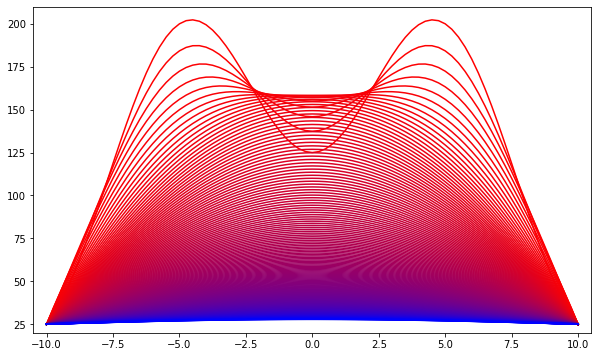

In [59]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))

for j in range(0,m):
    plt.plot(x, T[:, j] , color = [R[j], G, B[j]])

# plt.legend([f't={5*t_value.round(3)}' for t_value in t])

plt.xlim(-10.5,10.5)
plt.ylim(20,210)

plt.show()

In [60]:
x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape, T.shape)

(201, 81) (201, 81) (81, 201)


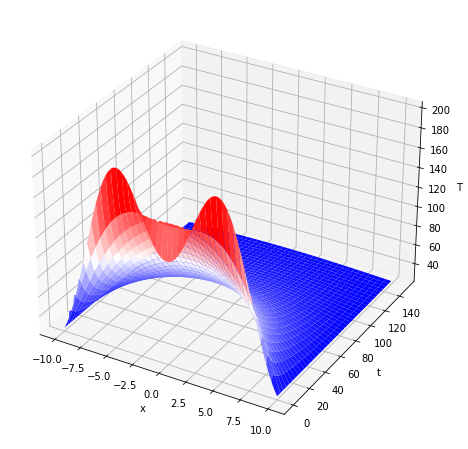

In [61]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, T.T, cmap='bwr') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel('T')

plt.show()

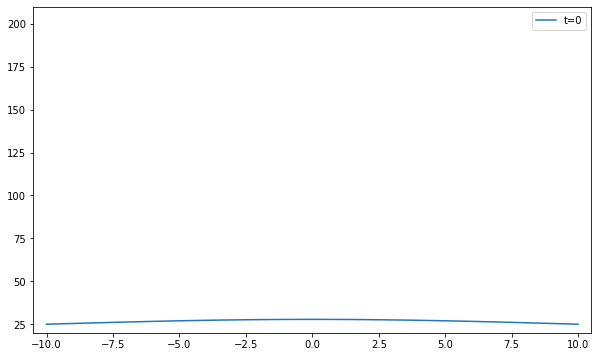

In [62]:
# Plotting
plt.figure(figsize=(10,6))

plt.plot(x, T[:, -1], label = 't=0')

plt.xlim(-10.5,10.5)
plt.ylim(20,210)

plt.legend()
plt.show()

#### $$\apha = 0.543$$

In [63]:
# # Steps:

# h = 0.25 # for space
# k = 2.5 # for time

# Time and Space Vectors
x = np.arange(-10, 10 + h, h)

t = np.arange(0, 250 + k, k)

print(len(x2),len(t2)) # Matrices should n-2 x n-2 = 39x39 

81 335


In [34]:
# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=0)

# Initial conditions

ics = 175 - 50*np.cos((np.pi*x2)/5) - x2**2

In [35]:
# Matrix for temperatures

n = len(x2)
m = len(t2)

T2 = np.zeros((n,m))

print(T2.shape)

(81, 101)


In [36]:
# Add the bcs:

T2[0, :] = bcs[0]

T2[-1, :] = bcs[1]


# Add the ics

T2[:, 0] = ics

print(T)

[[25.         25.         25.         ... 25.         25.
  25.        ]
 [30.55308297 34.35052714 33.71239878 ... 25.11509446 25.11275463
  25.11046236]
 [37.19717419 43.18023285 42.84980392 ... 25.23001146 25.22533539
  25.22075439]
 ...
 [37.19717419 43.18023285 42.84980392 ... 25.23001146 25.22533539
  25.22075439]
 [30.55308297 34.35052714 33.71239878 ... 25.11509446 25.11275463
  25.11046236]
 [25.         25.         25.         ... 25.         25.
  25.        ]]


In [37]:
# alpha = 

alpha = 0.543 #in cm

r_factor = (alpha)*k/h**2

print(r_factor)

21.720000000000002


In [38]:
D1_matrix_0 = np.diag([2 + 2*r_factor]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

#print(D1_matrix_0)
print(D1_matrix)
print(D1_matrix.shape)

[[ 45.44 -21.72   0.   ...   0.     0.     0.  ]
 [-21.72  45.44 -21.72 ...   0.     0.     0.  ]
 [  0.   -21.72  45.44 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...  45.44 -21.72   0.  ]
 [  0.     0.     0.   ... -21.72  45.44 -21.72]
 [  0.     0.     0.   ...   0.   -21.72  45.44]]
(79, 79)


In [39]:
D2_matrix_0 = np.diag([2 - 2*r_factor]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

print(D2_matrix)
print(D2_matrix.shape)

[[-41.44  21.72   0.   ...   0.     0.     0.  ]
 [ 21.72 -41.44  21.72 ...   0.     0.     0.  ]
 [  0.    21.72 -41.44 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ... -41.44  21.72   0.  ]
 [  0.     0.     0.   ...  21.72 -41.44  21.72]
 [  0.     0.     0.   ...   0.    21.72 -41.44]]
(79, 79)


In [40]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T2[1:-1, j].copy()
    #print(b.shape)
    #print(b)
    
    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor*(T2[0, j+1] + T2[0, j])
    b[-1] = b[-1] + r_factor*(T2[-1, j+1] + T2[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T2[1:-1, j+1] = sln_b
    
#print(T)

In [41]:
m

101

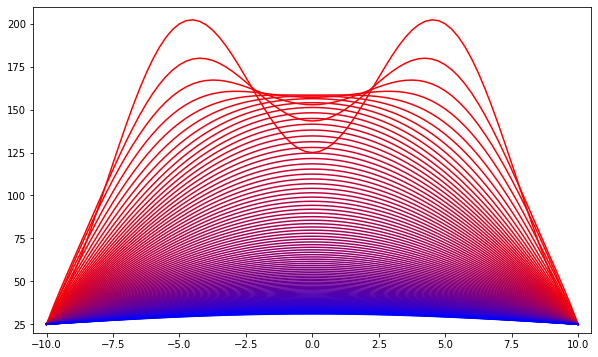

In [43]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))

for j in range(0,m):
    plt.plot(x2, T2[:, j] , color = [R[j], G, B[j]])

# plt.legend([f't={5*t_value.round(3)}' for t_value in t])

plt.xlim(-10.5,10.5)
plt.ylim(20,210)

plt.show()

In [44]:
x2_grid, t2_grid = np.meshgrid(x2, t2)

print(x_grid.shape, t_grid.shape, T.shape)

(201, 81) (201, 81) (81, 201)


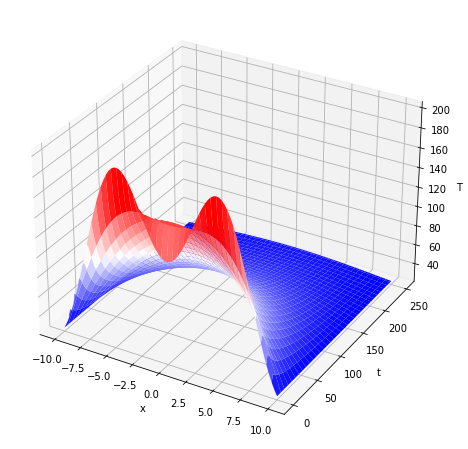

In [45]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.plot_surface(x2_grid, t2_grid, T2.T, cmap='bwr') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel('T')

plt.show()

### b)

In [48]:
m1

201

### c) 

IndexError: index 101 is out of bounds for axis 0 with size 101

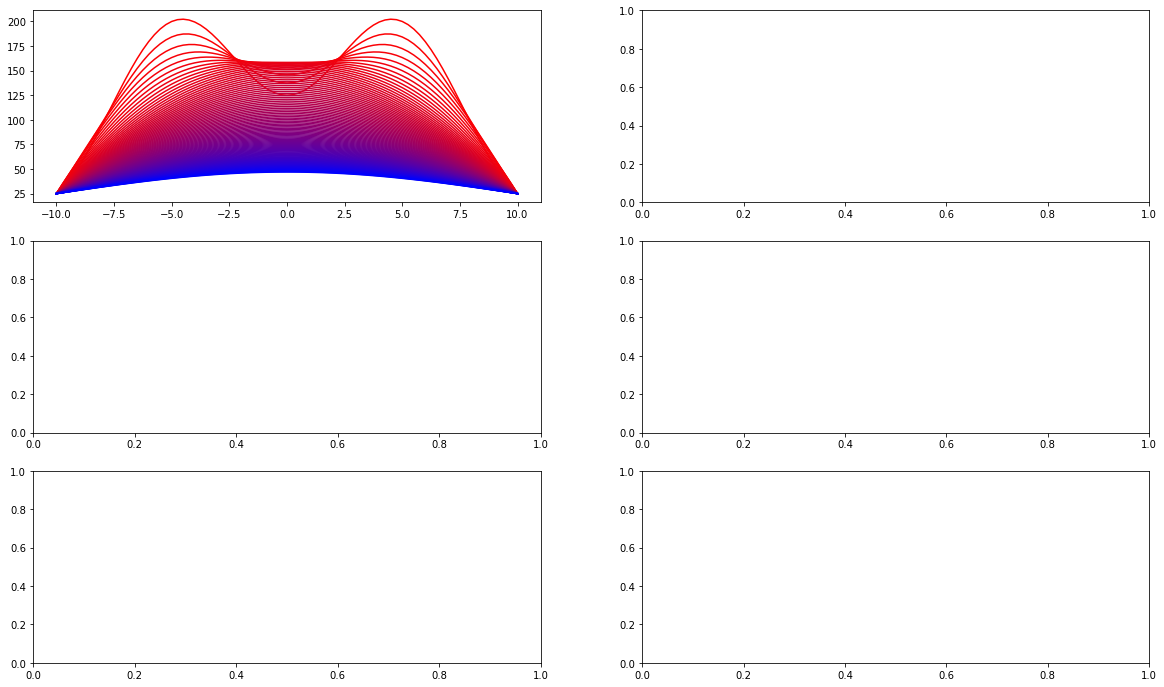

In [47]:
x_grid, t_grid = np.meshgrid(x1, t1)

m1 = len(t1)
m2 = len(t2)

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(20,12))

for j in range(0,m1):
    ax1.plot(x1, T[:, j] , color = [R[j], G, B[j]])

for j in range(0,m2):
    ax2.plot(x2, T2[:, j] , color = [R[j], G, B[j]])

ax5.pcolor(x_grid, t_grid, T.T, cmap = 'bwr')

ax6.pcolor(x2_grid, t2_grid, T2.T, cmap = 'bwr')